# Machine learning - Project - 1
author: Ben Delcoigne, Thomas Heuschling

## Feature selection

We will start by importing our data and taking a first look at it: 


In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.feature_selection import SelectFromModel
import sklearn.feature_selection as fsl
from sklearn.preprocessing import StandardScaler

X1 = pd.read_csv('X1.csv')
Y1 = pd.read_csv('Y1.csv', header = None, names = ['shares'])

X1 = X1

In [3]:
X1.describe()
#X1.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,...,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000,19822.000000
mean,10.411512,549.140046,0.530362,0.970588,0.673084,10.885481,3.310816,4.565533,1.247150,4.546683,...,0.353781,0.095195,0.758606,-0.260299,-0.523224,-0.107931,0.284106,0.072923,0.340922,0.156732
std,2.113789,474.327394,0.136488,0.168962,0.153209,11.103105,3.955175,8.327683,4.002838,0.838940,...,0.104390,0.070253,0.247975,0.128335,0.289211,0.096900,0.324519,0.264179,0.188922,0.224817
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,247.000000,0.470127,1.000000,0.625000,4.000000,1.000000,1.000000,0.000000,4.475899,...,0.306400,0.050000,0.600000,-0.327976,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,413.000000,0.539007,1.000000,0.690351,7.000000,3.000000,1.000000,0.000000,4.661765,...,0.358333,0.100000,0.800000,-0.253332,-0.500000,-0.100000,0.166667,0.000000,0.500000,0.006981
75%,12.000000,719.000000,0.608575,1.000000,0.754717,14.000000,4.000000,4.000000,1.000000,4.849668,...,0.410540,0.100000,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,19.000000,8474.000000,1.000000,1.000000,1.000000,171.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


In [4]:
Y1.describe()

,shares
count,19822.00000
mean,3430.66850
std,11789.36858
min,1.00000
25%,949.00000
50%,1400.00000
75%,2800.00000
max,843300.00000


## Removing outliers?


In [4]:
z_scores = scipy.stats.zscore(Y1)
filtered = (np.abs(z_scores)<3).all(axis=1)
print(filtered)
true = 0
total = len(filtered)
for i in filtered: 
    if i:
        true+=1
print(true)
print(total)

X1 = X1[filtered]
Y1 = Y1[filtered]

Y1.describe()

[ True  True  True ...  True  True  True]
19663
19822


,shares
count,19663.000000
mean,2768.815135
std,3992.858725
min,1.000000
25%,945.000000
50%,1400.000000
75%,2700.000000
max,38700.000000


In [5]:
#We can take a look at the correlation of our data
n_samples, n_feats = X1.shape
corr_vec = np.corrcoef(X1,Y1, rowvar=False)[-1, :n_feats]
most_corr = np.argsort(np.abs(corr_vec))

print(corr_vec)

[ 7.93056036e-03 -5.51693956e-03  4.20821088e-03 -8.19785785e-03
 -9.52402181e-03  4.84827454e-02  9.40460500e-04  4.96259743e-02
  2.43833977e-02 -8.72370544e-03  1.88496809e-02  9.05685812e-03
 -2.29085648e-02 -2.17029463e-02  1.03936407e-02 -1.76252135e-02
 -4.72750742e-02  7.95940415e-03  3.98978038e-02  3.69800097e-02
  3.54394818e-03  3.62882642e-05  4.09031635e-02  3.71300919e-02
  7.12122257e-02  1.08068326e-01  3.32004683e-02  3.93034233e-02
  3.87121511e-02  1.12233924e-03 -1.05325845e-02 -4.70772052e-03
 -4.94923774e-04 -4.14603782e-03  2.04228348e-02  8.89484178e-03
  2.12337369e-02 -7.17960895e-03 -1.71609389e-02 -5.64053239e-02
  8.92261231e-02 -1.68970834e-02  3.93858083e-02  1.06958987e-02
  7.05213539e-03  5.90850743e-03 -3.00432054e-03 -5.17385466e-03
  1.91476463e-02  5.52392163e-03  1.83621599e-02 -3.14893771e-02
 -1.82248346e-02 -2.36275039e-02  2.22861057e-02  9.32417781e-03
  3.83984719e-03  2.82750794e-02]


We notice the linear correlation between the features is not good, which is to be expected

## Normalizing our data
In order for our models to work, we can normalize the data. This is to make sure some data are not overwhelming the effects of other data since some models apply the same weight to each feature. 

In [6]:

#df = X1
#normalized_df = (df-df.min())/(df.max()-df.min())
#X1 = normalized_df


StdSca = StandardScaler() # c'est la fonction qu'on a utilisé dans les TP

X1 = pd.DataFrame(StdSca.fit_transform(X1), columns=X1.columns)
X1.describe() #values are now correctly centered around 0 with std = 1

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04,19822.000000,1.982200e+04,...,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04,1.982200e+04
mean,1.333477e-16,9.266234e-17,2.527155e-17,2.752986e-16,-8.459696e-17,-1.032370e-16,-5.735387e-17,-3.584617e-19,0.000000,-3.817617e-17,...,-5.735387e-16,-2.043232e-17,5.086571e-16,4.731694e-17,-4.240602e-16,-1.752878e-16,-6.954157e-17,8.603080e-18,3.989678e-16,-9.427542e-17
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025,1.000025e+00,...,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-3.979453e+00,-1.157753e+00,-3.885875e+00,-5.744563e+00,-4.393353e+00,-9.804244e-01,-8.371057e-01,-5.482495e-01,-0.311574,-5.419694e+00,...,-3.389117e+00,-1.355073e+00,-3.059282e+00,-5.763995e+00,-1.648583e+00,-9.206286e+00,-8.754894e-01,-4.061445e+00,-1.804608e+00,-6.971700e-01
25%,-6.677810e-01,-6.370024e-01,-4.413313e-01,1.740776e-01,-3.138544e-01,-6.201557e-01,-5.842660e-01,-4.281651e-01,-0.311574,-8.437516e-02,...,-4.538902e-01,-6.433396e-01,-6.396203e-01,-5.273627e-01,-6.112505e-01,-1.761537e-01,-8.754894e-01,-2.760421e-01,-9.223883e-01,-6.971700e-01
50%,-1.946849e-01,-2.870243e-01,6.334356e-02,1.740777e-01,1.127025e-01,-3.499542e-01,-7.858668e-02,-4.281651e-01,-0.311574,1.371788e-01,...,4.361231e-02,6.839362e-02,1.669338e-01,5.428671e-02,8.030433e-02,8.185009e-02,-3.618953e-01,-2.760421e-01,8.420512e-01,-6.661194e-01
75%,7.515072e-01,3.581160e-01,5.730564e-01,1.740777e-01,5.328338e-01,2.805159e-01,1.742530e-01,-6.791175e-02,-0.061745,3.611619e-01,...,5.437399e-01,6.839362e-02,9.734878e-01,5.672743e-01,7.718592e-01,5.978576e-01,6.652928e-01,2.917683e-01,8.420512e-01,4.148738e-01
max,4.063179e+00,1.670800e+01,3.440965e+00,1.740777e-01,2.133844e+00,1.442106e+01,2.849230e+01,1.482256e+01,22.422868,4.165899e+00,...,6.190592e+00,1.287959e+01,9.734878e-01,2.028336e+00,1.809191e+00,1.113865e+00,2.206075e+00,3.509361e+00,8.420512e-01,3.751005e+00


### Lasso feature importance

We have a look at the feature importance using lasso first: 

Lasso works well for linear approximations. We should get an idea of which features are important with this method but should not expect the best results. 



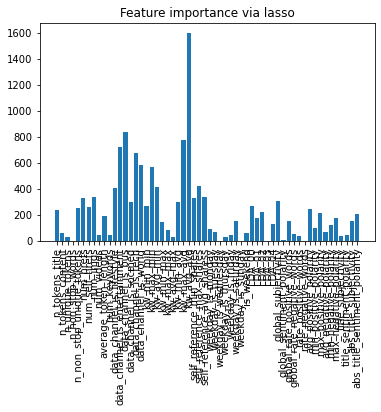

In [7]:
lasso = lm.Lasso().fit(X1,Y1)
importance = np.abs(lasso.coef_)
feature_names = np.arange(0,n_feats)
plt.bar(height=importance, x=feature_names)
plt.xticks(feature_names, X1.columns, rotation='vertical')
plt.title("Feature importance via lasso")
plt.show()

I notice a spike on this graph, lets see which feature it is.

In [8]:
print(X1.columns[np.argmax(importance)])

kw_avg_avg


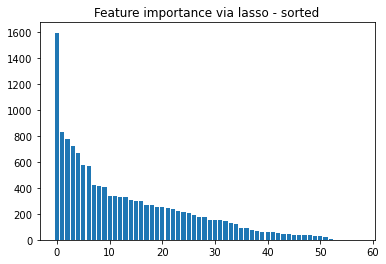

In [9]:
sorted_importance = np.sort(importance)[::-1]
plt.bar(height = sorted_importance, x=feature_names)
plt.title("Feature importance via lasso - sorted")
plt.show()


In [10]:
features_to_take = 20
threshold = np.sort(importance)[-features_to_take]# + 0.01
lasso = SelectFromModel(lasso, threshold=threshold).fit(X1, Y1)
print("Features selected by SelectFromModel: "
      f"{feature_names[lasso.get_support()]}")

print("Features selected by SelectFromModel: "
      f"{X1.columns[lasso.get_support()]}")

Features selected by SelectFromModel: [ 5  6  7 11 12 13 14 15 16 17 18 19 23 24 25 26 27 28 37 42]
Features selected by SelectFromModel: Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'global_subjectivity'],
      dtype='object')


### Mutual information 

Feature selection can be performed with a criterion that quantifies the pertinence of features for predicting the target. We will investigate the two following criteria: the correlation coefficient (using `numpy.corrcoef`) and the mutual information (using `sklearn.feature_selection.mutual_info_regression`). A simple feature selection strategy consists in selecting the features achieving a sufficiently high score for a given criterion. 



In [11]:
#Finding the correlation 
#correlation = np.corrcoef(X1)

In [12]:
#Finding the mutual information
import time
start_time = time.time()
mutualinfo = fsl.mutual_info_regression(X1, Y1.values.ravel())
print("--- %s seconds ---" % (time.time() - start_time))

--- 41.8426787853241 seconds ---


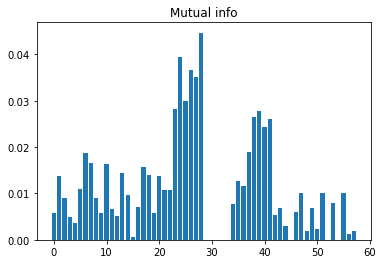

In [13]:
feature_names = np.arange(0,n_feats)


plt.bar(height=mutualinfo, x=feature_names)
plt.title("Mutual info")
plt.show()

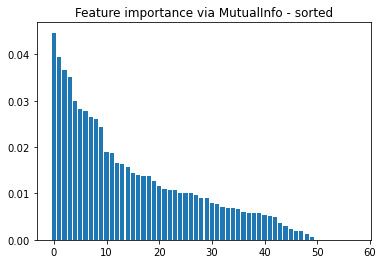

In [14]:
sorted_mutualinfo = np.sort(mutualinfo)[::-1]
plt.bar(height = sorted_mutualinfo, x=feature_names)
plt.title("Feature importance via MutualInfo - sorted")
plt.show()


In [15]:
features_to_take = 5
threshold = sorted_mutualinfo[features_to_take] 
print(threshold)
selected_mutinfo = np.argwhere(mutualinfo > threshold)
print(selected_mutinfo.T)
print(X1.columns[selected_mutinfo].shape)
print(X1.columns[selected_mutinfo])


0.028255623381387984
[[24 25 26 27 28]]
(5, 1)
[['kw_max_avg']
 ['kw_avg_avg']
 ['self_reference_min_shares']
 ['self_reference_max_shares']
 ['self_reference_avg_sharess']]


The most important feature in **lasso** is also in the most important features here. We have a good idea this feature is of great importance. 

## Defining a learning and a validation set
For this project, I will choose the following ponderation
 - 80% Learning set
 - 20% test set

In [16]:
from sklearn.model_selection import train_test_split

colnames = (X1.columns[selected_mutinfo]).reshape(-1)
print(colnames)
X1_selected = X1[colnames]

print(X1_selected.columns)

X_train, X_test, y_train, y_test = train_test_split(X1_selected, Y1, test_size=0.2, random_state=1)

['kw_max_avg' 'kw_avg_avg' 'self_reference_min_shares'
 'self_reference_max_shares' 'self_reference_avg_sharess']
Index(['kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess'],
      dtype='object')


Before we can start creating models, we must have a score function. It was defined in the statement: 


In [17]:
import sklearn
def score_f1(ytrue, ypred, th):
    return sklearn.metrics.f1_score(ytrue>th, ypred>th)
def score_regression(ytrue, ypred):
    scores = [score_f1(ytrue, ypred, th=th) for th in [500,1400,5000,10000]]
    return np.mean(scores)

score_regression(y_test, y_test)
#Should print 1 since we're testing a good input-output ratio

1.0

## Linear Regression

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
linearegr = lm.LinearRegression(n_jobs=-1)
linearegr.fit(X_train, y_train)

linear_ypred = linearegr.predict(X_test)
print(linearegr.score(X_test, y_test))
print(score_regression(linear_ypred, y_test))

0.011973895568746173
0.471704828447289


## KNN Regressor
When training on k neighbors, we must choose how many neighbors we will choose. For that reason, I will apply the KMN algorithm on 10K values.

In [49]:
def knnscore(i):
    knnregr = sklearn.neighbors.KNeighborsRegressor(i, n_jobs=-1)
    knnregr.fit(X_train, y_train)
    
    yknn = knnregr.predict(X_test)
    ret = score_regression(yknn, y_test)
    return ret

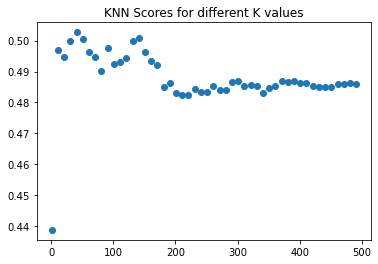

In [50]:
Kvalue = []
Kscore = []
for i in range(1,500,10):
    Kvalue.append(i)
    Kscore.append(knnscore(i))

plt.scatter(Kvalue, Kscore)
plt.title('KNN Scores for different K values')
plt.show()

In [51]:
Kvalue[3]

31

**BEST RESULTS I GOT**
- Selected features: 5 - Mutual info - No normalization
- Kvalue: 31
- Best val: 0.507

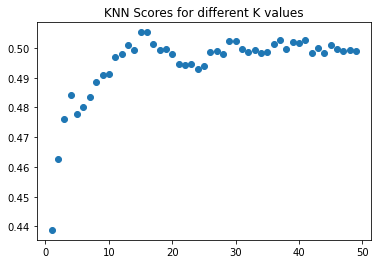

In [56]:
Kvalue = []
Kscore = []
for i in range(1,50,1):
    Kvalue.append(i)
    Kscore.append(knnscore(i))

plt.scatter(Kvalue, Kscore)
plt.title('KNN Scores for different K values')

plt.show()

In [57]:
print(np.argmax(Kscore))
print(np.max(Kscore))



14
0.5052925651542596


In [60]:
from sklearn.metrics import make_scorer
tuned_parameters = {'n_neighbors' : range(1, 51),
                    'weights' : ['uniform', 'distance']}
              
scorer = make_scorer(score_regression, greater_is_better = True) # score => f1

knn_clf = GridSearchCV(
    sklearn.neighbors.KNeighborsRegressor(), tuned_parameters, scoring = scorer, verbose = 1, n_jobs = -1
)
knn_clf.fit(X_train.values, y_train.values.reshape(-1))

print("Best parameters set found on development set:")
print()
print(knn_clf.best_params_)
print()
y_true, y_pred = y_test, knn_clf.predict(X_test)

print("Score computed on the test set:")
print()
print(score_regression(y_true, y_pred))

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   10.5s
Best parameters set found on development set:

{'n_neighbors': 45, 'weights': 'uniform'}

Score computed on the test set:
0.500882178102505
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:   12.0s finished


## best result :

{'n_neighbors': 45, 'weights': 'uniform'}

## score on test data :

0.500882178102505

maybe try with 

# SKLEARN MLP
After numerous attempts on coding the MLP on Pytorch, i managed to get a working template (see pytorch), however its results were not promising. I then switched to TensorFlow which was a pain to install, but I managed to get it working on google collab. The results are not promising either. I thus result in using sklearn which is a billion times less painful to code with, the performances are just reduced because computations are done on the cpu and not the GPU. The results are the same anyway. The reason I stick with sklearn is because setting the parameters is a lot quicker and more user-friendly. 

In [24]:
print(y_train.values.shape)
print(X_train.values.shape)

print(type(X_train.values))

(15857, 1)
(15857, 5)
<class 'numpy.ndarray'>


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
print(X_train.values.shape[0])
print(X_train.values.shape[0]//200)

#rgr = MLPRegressor(hidden_layer_sizes=(50,50,50), verbose=True, learning_rate = 'adaptive', learning_rate_init = 0.2, max_iter = 500)

tuned_parameters = {'learning_rate_init': [0.1544],#np.linspace(0.153, 0.154, 10, endpoint=True), #cheched aroud 0.1585
                    'activation' : ['relu'], # checked
                    'solver': ['adam'], # "checked"
                    'max_iter': [500],
                    'alpha' : np.linspace(0.0008, 0.00085, 20, endpoint = True),
                    'beta_1' : np.linspace(0.7, 0.99, 10, endpoint = True),
                    'beta_2' : np.linspace(0.9, 0.9999, 10, endpoint = True),
                    'hidden_layer_sizes' : [(50,50,50)]}

scorer = make_scorer(score_regression, greater_is_better = True) # score => f1
score = 'f1'

print("# Tuning hyper-parameters for %s" % score)
print()

mlp_clf = GridSearchCV(
    MLPRegressor(), tuned_parameters, scoring = scorer, verbose = 1, error_score = -1, n_jobs = 7
)
mlp_clf.fit(X_train.values, y_train.values.reshape(-1))

print("Best parameters set found on development set:")
print()
print(mlp_clf.best_params_)
print()

y_true, y_pred = y_test, mlp_clf.predict(X_test)

15857
79
# Tuning hyper-parameters for f1

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  1.9min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  8.9min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed: 20.6min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed: 34.8min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed: 53.7min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed: 75.9min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed: 102.6min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed: 133.5min
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed: 168.6min
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed: 207.1min
[Parallel(n_jobs=7)]: Done 6036 tasks      | elapsed: 250.2min
[Parallel(n_jobs=7)]: Done 7186 tasks      | elapsed: 299.0min
[Parallel(n_jobs=7)]: Done 8436 tasks      | elapsed: 350.8min
[Parall

In [98]:
print("Best parameters set found on development set:")
print()
print(mlp_clf.best_params_)
print()
print(score_regression(y_true, y_pred))
print(mlp_clf.best_score_)

Best parameters set found on development set:

{'activation': 'relu', 'alpha': 0.0008157894736842105, 'beta_1': 0.7966666666666666, 'beta_2': 0.9999, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate_init': 0.1544, 'max_iter': 500, 'solver': 'adam'}

0.47837910306007714
0.5094298654521274


In [100]:
rgr = MLPRegressor(hidden_layer_sizes=(50,50,50), activation = 'relu', alpha = 0.0001, solver = 'adam', verbose=True, learning_rate_init = 0.15444444444444444, max_iter = 500)
rgr.fit(X_train.values, y_train)
y_predict = rgr.predict(X_test)

print(score_regression(y_test, y_predict))

Iteration 1, loss = 60819575.79375263
Iteration 2, loss = 57901736.28309436
Iteration 3, loss = 57860712.49757469
Iteration 4, loss = 57462708.97533816
Iteration 5, loss = 57408628.56108539
Iteration 6, loss = 57256483.29030519
Iteration 7, loss = 57507792.44366378
Iteration 8, loss = 57518173.73905421
Iteration 9, loss = 57177773.82530801
Iteration 10, loss = 57119774.15162012
Iteration 11, loss = 57105900.46913712
Iteration 12, loss = 57317536.92704625
Iteration 13, loss = 56966119.73992199
Iteration 14, loss = 57589575.95664006
Iteration 15, loss = 57008834.40066422
Iteration 16, loss = 56985146.25579023
Iteration 17, loss = 57025964.61385980
Iteration 18, loss = 56922526.79114842
Iteration 19, loss = 57072494.42962964
Iteration 20, loss = 56946916.79155328
Iteration 21, loss = 56905670.21602548
Iteration 22, loss = 56885678.00585409
Iteration 23, loss = 56794844.38309103
Iteration 24, loss = 56876506.80322792
Iteration 25, loss = 56792711.81909183
Iteration 26, loss = 56859021.0277

In [111]:
from sklearn.model_selection import cross_val_score

rgr = MLPRegressor(hidden_layer_sizes=(50,50,50), activation = 'relu', alpha = 0.0008, solver = 'adam', verbose=True, learning_rate_init = 0.15444444444444444, max_iter = 500, tol = 1e-6, beta_1 = 0.8, beta_2 = 0.999)
rgr.fit(X_train.values, y_train)
y_predict = rgr.predict(X_test)


rgr2 = MLPRegressor(hidden_layer_sizes=(50,50,50), activation = 'relu', alpha = 0.0008, solver = 'adam', verbose=True, learning_rate_init = 0.15444444444444444, max_iter = 500, tol = 1e-6, beta_1 = 0.8, beta_2 = 0.999)
scores = cross_val_score(rgr2, X_train, y_train, scoring = scorer, n_jobs = 7, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(score_regression(y_test, y_predict))

Iteration 1, loss = 59145725.64569323
Iteration 2, loss = 58216374.37246618
Iteration 3, loss = 57788033.82794371
Iteration 4, loss = 57544892.37303403
Iteration 5, loss = 57456647.30847662
Iteration 6, loss = 57256024.54469217
Iteration 7, loss = 57452596.87931410
Iteration 8, loss = 57349062.20800692
Iteration 9, loss = 57043496.67586854
Iteration 10, loss = 57269614.44315318
Iteration 11, loss = 57213969.76706529
Iteration 12, loss = 57027120.93983629
Iteration 13, loss = 57007382.41236546
Iteration 14, loss = 57140414.61498108
Iteration 15, loss = 57122307.65865806
Iteration 16, loss = 57012911.69742876
Iteration 17, loss = 57230820.66805426
Iteration 18, loss = 57104196.39447895
Iteration 19, loss = 56976144.18242810
Iteration 20, loss = 57007929.06463706
Iteration 21, loss = 56904241.27825975
Iteration 22, loss = 57091964.29147828
Iteration 23, loss = 56967051.50284529
Iteration 24, loss = 56894150.30812082
Iteration 25, loss = 56990153.95132367
Iteration 26, loss = 56939590.6791

first few hyperparameter optimisation:

{'activation': 'relu', 'alpha': 0.000825, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate_init': 0.15377777777777776, 'max_iter': 500, 'solver': 'adam'}

0.5045849559280111

In [ ]:
print(score_regression(y_predicted, y_test))

**Worse than Linear regression.**